In [3]:
import pandas as pd
cars = pd.read_csv("imports.data", 
                   names = ['symboling', 'normalized_losses', 
                              'make', 'fuel_type', 'aspiration',
                             'num_doors', 'body_style', 'drive_wheels',
                             'engine_location', 'wheel_base', 'length',
                             'width', 'height', 'curb_weight', 'engine_type',
                             'num_cylinders', 'engine_size', 'fuel_system',
                             'bore', 'stroke', 'compression_ratio', 
                              'horsepower', 'peak_rpm', 'city_mpg',
                              'highway_mpg', 'price'])

In [4]:
cars.head(10)

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


- Target column = price
- Numeric columns = normalised_losses, wheel_base, length, width, height, curb-weight, engine_size, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg
- Feature columns = symboling, make, fuel_type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system

Data Cleaning/Feature Preparation and engineering:

Since the K-Nearest Neighbours algorithm uses euclidean distance to form the clusters, we can only use numerical values. We will have to deal with missing values and categorical columns:

In [6]:
import numpy as np
cars = cars.replace("?", np.nan)

In [7]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [8]:
#correct datatypes:
cars['normalized_losses'] = cars['normalized_losses'].astype(float)
cars['bore'] = cars['bore'].astype(float)
cars['stroke'] = cars['stroke'].astype(float)
cars['horsepower'] = cars['horsepower'].astype(float)
cars['peak_rpm'] = cars['peak_rpm'].astype(float)
cars['price'] = cars['price'].astype(float)

In [28]:
#drop categorical columns:
to_drop = ["symboling", "make", "fuel_type", "aspiration", "body_style", "drive_wheels", "engine_location", "engine_type",  "fuel_system", "engine_size"]
cars_num = cars.drop(to_drop, axis=1)
cars_num.head(10)

,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,two,88.6,168.8,64.1,48.8,2548,four,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,NaN,two,88.6,168.8,64.1,48.8,2548,four,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,NaN,two,94.5,171.2,65.5,52.4,2823,six,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,164.0,four,99.8,176.6,66.2,54.3,2337,four,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,164.0,four,99.4,176.6,66.4,54.3,2824,five,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,NaN,two,99.8,177.3,66.3,53.1,2507,five,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,158.0,four,105.8,192.7,71.4,55.7,2844,five,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,NaN,four,105.8,192.7,71.4,55.7,2954,five,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,158.0,four,105.8,192.7,71.4,55.9,3086,five,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,NaN,two,99.5,178.2,67.9,52.0,3053,five,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


The num_cylinders and num_doors columns can be converted to numerical using a simple function:

In [29]:
print(cars_num['num_cylinders'].value_counts())
print(cars_num['num_doors'].value_counts())

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num_cylinders, dtype: int64
four    114
two      89
Name: num_doors, dtype: int64


In [30]:
def convert_nums(text):
    if text == 'four':
        return 4
    elif text == 'two':
        return 2
    elif text == 'six':
        return 6
    elif text == 'five':
        return 5
    elif text == 'eight':
        return 8
    elif text == 'three':
        return 3
    else:
        return 12

In [31]:
cars_num['num_cylinders_num'] = cars_num['num_cylinders'].apply(convert_nums)
cars_num['num_doors_num'] = cars_num['num_doors'].apply(convert_nums)
cars_num.head(15)

,normalized_losses,num_doors,wheel_base,length,width,height,curb_weight,num_cylinders,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,num_cylinders_num,num_doors_num
0,NaN,two,88.6,168.8,64.1,48.8,2548,four,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4,2
1,NaN,two,88.6,168.8,64.1,48.8,2548,four,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,4,2
2,NaN,two,94.5,171.2,65.5,52.4,2823,six,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,6,2
3,164.0,four,99.8,176.6,66.2,54.3,2337,four,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4,4
4,164.0,four,99.4,176.6,66.4,54.3,2824,five,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5,4
5,NaN,two,99.8,177.3,66.3,53.1,2507,five,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,5,2
6,158.0,four,105.8,192.7,71.4,55.7,2844,five,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,5,4
7,NaN,four,105.8,192.7,71.4,55.7,2954,five,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,5,4
8,158.0,four,105.8,192.7,71.4,55.9,3086,five,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,5,4
9,NaN,two,99.5,178.2,67.9,52.0,3053,five,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,5,2


In [32]:
cars_num = cars_num.drop(['num_doors', 'num_cylinders'], axis=1)
cars_num.head(10)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,num_cylinders_num,num_doors_num
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,4,2
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,4,2
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,6,2
3,164.0,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,4,4
4,164.0,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,5,4
5,NaN,99.8,177.3,66.3,53.1,2507,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,5,2
6,158.0,105.8,192.7,71.4,55.7,2844,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,5,4
7,NaN,105.8,192.7,71.4,55.7,2954,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,5,4
8,158.0,105.8,192.7,71.4,55.9,3086,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,5,4
9,NaN,99.5,178.2,67.9,52.0,3053,3.13,3.40,7.0,160.0,5500.0,16,22,NaN,5,2


Now to deal with missing values:

In [33]:
cars_num = cars_num.astype("float")
cars_num.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
num_cylinders_num     0
num_doors_num         0
dtype: int64

Since 'price' is the target column, we can remove missing values:

In [34]:
cars_num = cars_num.dropna(subset=["price"])
cars_num.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
num_cylinders_num     0
num_doors_num         0
dtype: int64

Next we will deal with 'bore', 'stroke', 'horsepower' and 'peak_rpm'. We could just use the mean but its worth inspecting the values first:

In [39]:
print(cars_num['bore'].value_counts())
print(cars_num['stroke'].value_counts())
print(cars_num['horsepower'].value_counts())
cars_num['peak_rpm'].value_counts()

3.62    23
3.19    20
3.15    15
2.97    12
3.03    10
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.05     6
3.58     6
3.39     6
3.54     6
3.01     5
3.70     5
3.35     4
3.74     3
3.59     3
3.17     3
3.24     2
3.63     2
3.80     2
3.47     2
3.33     2
3.50     2
2.92     1
3.08     1
3.61     1
3.94     1
2.99     1
3.76     1
2.68     1
3.34     1
3.60     1
3.13     1
2.54     1
Name: bore, dtype: int64
3.40    19
3.03    14
3.15    14
3.23    14
3.39    13
2.64    11
3.35     9
3.29     9
3.46     8
3.41     6
3.19     6
3.07     6
3.58     6
3.27     6
3.50     6
3.64     5
3.52     5
3.47     4
3.86     4
3.54     4
3.90     3
2.90     3
3.11     3
3.08     2
2.19     2
2.80     2
3.10     2
4.17     2
2.68     2
2.87     1
3.21     1
3.16     1
3.12     1
2.76     1
2.07     1
2.36     1
Name: stroke, dtype: int64
68.0     19
69.0     10
70.0      9
116.0     9
110.0     8
95.0      7
114.0     6
101.0     6
88.0      6
62.0      6
82.0      5
97

4800.0    36
5500.0    36
5000.0    27
5200.0    23
5400.0    11
6000.0     9
4500.0     7
5800.0     7
5250.0     7
4200.0     5
4150.0     5
4750.0     4
4350.0     4
4400.0     3
5100.0     3
4250.0     3
5900.0     3
6600.0     2
4650.0     1
4900.0     1
5300.0     1
5600.0     1
Name: peak_rpm, dtype: int64

Use mean for all, although this may have been different if there were only a few distinct values

In [40]:
cars_num = cars_num.fillna(cars_num.mean())
cars_num.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
num_cylinders_num    0
num_doors_num        0
dtype: int64

If features arent properly scaled, clusters calculated in K-NN tend to be influenced by larger values. For example, if there were a column representing distance, the choice of units could have a large impact on cluster formation. Because of this, feature scaling needs to be done. In this case we will divide each value by its standard deviation.

In [42]:
normalized_cars = cars_num/cars_num.std()
normalized_cars['price'] = cars_num['price']
normalized_cars.head(10)

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,num_cylinders_num,num_doors_num
0,3.812947,14.605121,13.698880,30.502446,19.936089,4.925606,12.944292,8.479737,2.247210,2.970647,10.457775,3.269388,3.961762,13495.0,3.775538,1.509863
1,3.812947,14.605121,13.698880,30.502446,19.936089,4.925606,12.944292,8.479737,2.247210,2.970647,10.457775,3.269388,3.961762,16500.0,3.775538,1.509863
2,3.812947,15.577696,13.893651,31.168646,21.406784,5.457216,9.997321,10.979360,2.247210,4.121438,10.457775,2.958018,3.815030,16500.0,5.663307,1.509863
3,5.125601,16.451366,14.331885,31.501746,22.182984,4.517717,11.899796,10.757875,2.496900,2.729783,11.503552,3.736443,4.401957,13950.0,3.775538,3.019726
4,5.125601,16.385429,14.331885,31.596917,22.182984,5.459149,11.899796,10.757875,1.997520,3.077697,11.503552,2.802333,3.228102,17450.0,4.719423,3.019726
5,3.812947,16.451366,14.388693,31.549332,21.692752,4.846348,11.899796,10.757875,2.122365,2.943884,11.503552,2.958018,3.668298,15250.0,4.719423,1.509863
6,4.938079,17.440426,15.638473,33.976203,22.754921,5.497812,11.899796,10.757875,2.122365,2.943884,11.503552,2.958018,3.668298,17710.0,4.719423,3.019726
7,3.812947,17.440426,15.638473,33.976203,22.754921,5.710456,11.899796,10.757875,2.122365,2.943884,11.503552,2.958018,3.668298,18920.0,4.719423,3.019726
8,4.938079,17.440426,15.638473,33.976203,22.836626,5.965628,11.675975,10.757875,2.072427,3.746762,11.503552,2.646647,2.934638,23875.0,4.719423,3.019726
10,6.000703,16.682147,14.348116,30.835546,22.182984,4.629838,13.056202,8.859426,2.197272,2.703021,12.131019,3.580758,4.255226,16430.0,3.775538,1.509863


Now we are ready to run the K-NN algorithm. We are going to write a function that uses the KNeighborsRegressor class from scikit-learn.

In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, test_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(normalized_cars.index)
    rand_df = normalized_cars.reindex(shuffled_index)
    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train = df.iloc[:last_train_row]
    test = df.iloc[last_train_row:]
    # Fit a KNN model using default k value.
    knn.fit(train[[train_col]], train[test_col])
    # Make predictions using model.
    prediction = knn.predict(test[[train_col]])
    # Calculate and return RMSE.
    rmse = mean_squared_error(test[test_col], prediction)**(1/2)
    return rmse

rmse_results = {}
train_cols = normalized_cars.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.

for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_cars)
    rmse_results[col] = rmse_val
    
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

horsepower            4321.119223
highway_mpg           4569.920551
city_mpg              4844.285750
num_cylinders_num     5107.160476
curb_weight           5165.770857
width                 7729.728829
compression_ratio     8087.928817
normalized_losses     8110.963177
length                8304.189346
num_doors_num         8574.200589
peak_rpm              9127.369257
stroke                9265.139048
wheel_base            9969.243292
height               10949.419939
bore                 13538.523403
dtype: float64

This shows the RMSE from each column. 'Horsepower' has the lowest error. We need to modify the function to include the k value or the number of neighbors as a parameter. Then we can loop through a list of K values and features to determine which K value and features are most optimal in our machine learning model.

In [46]:
#Add K value

In [49]:
def knn_train_test(train_col, target_col, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [1,3,5,7,9]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
train_cols = normalized_cars.columns.drop('price')
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', normalized_cars)
    k_rmse_results[col] = rmse_val

k_rmse_results

{'bore': {1: 8505.6821531896621,
  3: 6892.7916208045044,
  5: 6804.3688758338076,
  7: 6935.4945227726312,
  9: 6891.9349200218367},
 'city_mpg': {1: 5863.1909434713079,
  3: 4594.1871111570144,
  5: 4911.2594312245492,
  7: 5249.501385842239,
  9: 5403.9163059539778},
 'compression_ratio': {1: 8087.205346523092,
  3: 7375.0636855783587,
  5: 6610.6574735703316,
  7: 6542.7994561486039,
  9: 6957.431678750334},
 'curb_weight': {1: 5264.2902307588784,
  3: 5022.3180117572329,
  5: 4445.1419203752348,
  7: 4330.6701276238755,
  9: 4632.9733391870905},
 'height': {1: 8800.7446590874024,
  3: 8131.6372921205157,
  5: 8060.7693595660467,
  7: 7715.7476007181231,
  9: 7776.6573443172147},
 'highway_mpg': {1: 6025.5949667207387,
  3: 4660.8858244830335,
  5: 4675.8605486155175,
  7: 4759.9493299999003,
  9: 5180.5648195235362},
 'horsepower': {1: 4170.0548480378011,
  3: 4027.6174917767462,
  5: 4047.3870142071019,
  7: 4208.8110697118964,
  9: 4512.5333137239577},
 'length': {1: 4611.990241

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 12))
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label = k)
    plt.xlabel('k value', fontsize = 14)
    plt.ylabel('RMSE', fontsize = 14)
    plt.legend()

This figure is meant to show us the optimal value of k for each parameter, but ends up looking a bit confusing. A better of of doing things might be to sort the values of the best_features by average RMSE.

In [69]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmse_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

Series([], dtype: float64)

Now this is done, we can begin applying the function to multiple features at once:

In [73]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

two_best_features = ['horsepower', 'width']
rmse_val = knn_train_test(two_best_features, 'price', normalized_cars)
k_rmse_results["two best features"] = rmse_val

three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(three_best_features, 'price', normalized_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', normalized_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', normalized_cars)
k_rmse_results["five best features"] = rmse_val

six_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg', 'length']
rmse_val = knn_train_test(six_best_features, 'price', normalized_cars)
k_rmse_results["six best features"] = rmse_val

k_rmse_results

{'five best features': {5: 3346.3794863306603},
 'four best features': {5: 3280.4341586001833},
 'six best features': {5: 3633.1572673239607},
 'three best features': {5: 3315.179311728235},
 'two best features': {5: 3589.3132622073304}}

In [75]:
def knn_train_test(train_cols, target_col, df):
    np.random.seed(1)
    
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)

    # Divide number of rows in half and round.
    last_train_row = int(len(rand_df) / 2)
    
    # Select the first half and set as training set.
    # Select the second half and set as test set.
    train_df = rand_df.iloc[0:last_train_row]
    test_df = rand_df.iloc[last_train_row:]
    
    k_values = [i for i in range(1, 10)]
    k_rmses = {}
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_cols], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_cols])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

k_rmse_results = {}

three_best_features = ['horsepower', 'width', 'curb_weight']
rmse_val = knn_train_test(three_best_features, 'price', normalized_cars)
k_rmse_results["three best features"] = rmse_val

four_best_features = ['horsepower', 'width', 'curb_weight', 'city_mpg']
rmse_val = knn_train_test(four_best_features, 'price', normalized_cars)
k_rmse_results["four best features"] = rmse_val

five_best_features = ['horsepower', 'width', 'curb_weight' , 'city_mpg' , 'highway_mpg']
rmse_val = knn_train_test(five_best_features, 'price', normalized_cars)
k_rmse_results["five best features"] = rmse_val

k_rmse_results

{'five best features': {1: 2536.2720615693083,
  2: 2959.8139220177841,
  3: 3111.2297992251169,
  4: 3199.3074433313604,
  5: 3346.3794863306603,
  6: 3675.5840031247285,
  7: 3881.6214585276716,
  8: 3987.0248411182879,
  9: 3986.2156175243376},
 'four best features': {1: 2544.734664921175,
  2: 2884.2236669320723,
  3: 2947.2851155351814,
  4: 3091.9924900922911,
  5: 3280.4341586001833,
  6: 3529.9715251892421,
  7: 3796.3071888581662,
  8: 3987.7859773998689,
  9: 4052.446344043095},
 'three best features': {1: 2672.7578685250141,
  2: 2821.2015026078575,
  3: 3135.9799922115503,
  4: 3204.253321893626,
  5: 3315.179311728235,
  6: 3471.0681296102557,
  7: 3772.1919269737646,
  8: 3962.910759818426,
  9: 4094.2475021933492}}

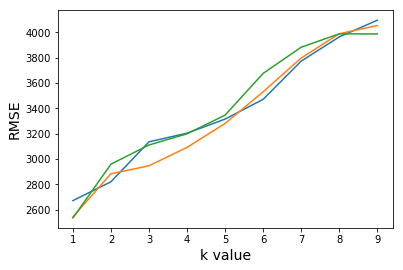

In [77]:
for k,v in k_rmse_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value', fontsize = 14)
    plt.ylabel('RMSE', fontsize = 14)

From the chart above, we see that choosing the best three features with a K value of 2 will give us the RMSE of approximately 2800. That is it for now though, the goal of this project is to explore the fundamentals of machine learning.